In [1]:
import pandas as pd

# Zero Shot

In [ ]:
actions_profit = pd.read_csv("results/03zeroshot/MIP_ZeroShot_actions_OnlyCosts.csv")
actions_emissions = pd.read_csv("results/03zeroshot/MIP_ZeroShot_actions_OnlyEmissions.csv")

In [47]:
#Only Costs

import sys
sys.path.insert(0, '..')
from environments.EnergyManagementEnvMIP import EnergyManagementEnv

action_df = pd.read_csv("results/03zeroshot/MIP_ZeroShot_actions_OnlyCosts.csv").reset_index(drop=True)
action_df = action_df.loc[:, ~action_df.columns.str.contains('^Unnamed')]
action_df = -action_df
action_df.head(1)

# Load your data
energy_data = pd.read_csv("../../data/3final_data/Final_Energy_dataset.csv").fillna(0).set_index('Date')

result_df = pd.DataFrame(columns=["Building", "Total Profit", "Total Emissions"])

offset = 30
for idx in range(offset+1,offset+31):
    data = energy_data[[f'load_{idx}', f'pv_{idx}', 'price', 'emissions']]

    energymanagement1 = pd.DataFrame()
    energymanagement1["Action"] = action_df[f"{idx}"]
    energymanagement1["SoE"] = energymanagement1["Action"].cumsum()
    energymanagement1["Price"] = data["price"][-17520:].values
    energymanagement1['Grid_emissions'] = data["emissions"][-17520:].values
    energymanagement1["Grid"] = data[f"load_{idx}"][-17520:].values - data[f"pv_{idx}"][-17520:].values + energymanagement1["Action"]
    energymanagement1['Profit'] = energymanagement1.apply(lambda row: row['Grid'] * row['Price'] if row['Grid'] > 0 else row['Grid'] * 0.076, axis=1)
    energymanagement1['Emissions'] = energymanagement1.apply(lambda row: row['Grid'] * row['Grid_emissions'] if row['Grid'] > 0 else 0, axis=1)

    result_df = pd.concat([ result_df, 
            pd.DataFrame({'Building': [idx], 'Total Profit': energymanagement1['Profit'].cumsum().iloc[-1], 'Total Emissions' : energymanagement1['Emissions'].cumsum().iloc[-1]})
            ], ignore_index=True)
    
#result_df.to_csv("results/03zeroshot/MIP_ZeroShot_Profit.csv")    
result_df

C:\Users\rs1044\AppData\Local\Temp\ipykernel_22144\3187989961.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([ result_df,


,Building,Total Profit,Total Emissions
0,31,645.979805,2530.028817
1,32,714.024606,2968.374993
2,33,1178.406934,4823.189958
3,34,1072.651133,4281.151262
4,35,1858.905081,7365.723353
5,36,1204.545812,5083.595840
6,37,473.500658,2010.758754
7,38,712.820934,2920.534177
8,39,1233.313164,5123.750942
9,40,523.307002,2207.761952


In [49]:
profit_df = result_df

In [51]:
profit_df["Total Profit"].mean()

963.8760430368635

In [52]:
#Only Costs

import sys
sys.path.insert(0, '..')
from environments.EnergyManagementEnvMIP import EnergyManagementEnv

action_df = pd.read_csv("results/03zeroshot/MIP_ZeroShot_actions_OnlyEmissions.csv").reset_index(drop=True)
action_df = action_df.loc[:, ~action_df.columns.str.contains('^Unnamed')]
action_df = -action_df
action_df.head(1)

# Load your data
energy_data = pd.read_csv("../../data/3final_data/Final_Energy_dataset.csv").fillna(0).set_index('Date')

result_df = pd.DataFrame(columns=["Building", "Total Profit", "Total Emissions"])

offset = 30
for idx in range(offset+1,offset+31):
    data = energy_data[[f'load_{idx}', f'pv_{idx}', 'price', 'emissions']]

    energymanagement1 = pd.DataFrame()
    energymanagement1["Action"] = action_df[f"{idx}"]
    energymanagement1["SoE"] = energymanagement1["Action"].cumsum()
    energymanagement1["Price"] = data["price"][-17520:].values
    energymanagement1['Grid_emissions'] = data["emissions"][-17520:].values
    energymanagement1["Grid"] = data[f"load_{idx}"][-17520:].values - data[f"pv_{idx}"][-17520:].values + energymanagement1["Action"]
    energymanagement1['Profit'] = energymanagement1.apply(lambda row: row['Grid'] * row['Price'] if row['Grid'] > 0 else row['Grid'] * 0.076, axis=1)
    energymanagement1['Emissions'] = energymanagement1.apply(lambda row: row['Grid'] * row['Grid_emissions'] if row['Grid'] > 0 else 0, axis=1)

    result_df = pd.concat([ result_df, 
            pd.DataFrame({'Building': [idx], 'Total Profit': energymanagement1['Profit'].cumsum().iloc[-1], 'Total Emissions' : energymanagement1['Emissions'].cumsum().iloc[-1]})
            ], ignore_index=True)

result_df.to_csv("results/03zeroshot/MIP_ZeroShot_Emissions.csv")    
result_df

C:\Users\rs1044\AppData\Local\Temp\ipykernel_22144\701070388.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([ result_df,


,Building,Total Profit,Total Emissions
0,31,673.690116,1609.750657
1,32,739.519850,1566.213400
2,33,1219.278887,3198.670920
3,34,1112.835471,2554.141836
4,35,1916.669020,5376.152549
5,36,1245.487822,3229.470781
6,37,492.859676,1026.078297
7,38,742.181796,1576.334803
8,39,1280.862639,3098.813992
9,40,543.735005,1109.041236


In [54]:
emissions_df = result_df

In [56]:
emissions_df["Total Emissions"].mean()

2520.8285028478062

In [35]:
#pd.read_csv("results/03zeroshot/MIP_ZeroShot_actions_OnlyCosts.csv")
zeroshot_costs = pd.read_csv("results/03zeroshot/MIP_ZeroShot_profits_OnlyCosts.csv")
zeroshot_costs = zeroshot_costs.drop('Unnamed: 0', axis=1).T.reset_index()
zeroshot_costs.columns = ['Building', 'Profit_MIP']
zeroshot_costs["Profit_MIP"].sum()*3


-86748.84386278712

In [ ]:
#Emission Evaluation

import sys
sys.path.insert(0, '..')
from environments.EnergyManagementEnvMIP import EnergyManagementEnv

action_df = pd.read_csv("../../data/3final_data/actions_big_m_100_final.csv").reset_index(drop=True)
action_df = action_df.loc[:, ~action_df.columns.str.contains('^Unnamed')]
action_df = -action_df
action_df.head(1)

# Load your data
energy_data = pd.read_csv("../../data/3final_data/Final_Energy_dataset.csv").fillna(0).set_index('Date')

result_df = pd.DataFrame(columns=["Building", "Total Profit", "Total Emissions"])

for idx in range(1,31):
    data = energy_data[[f'load_{idx}', f'pv_{idx}', 'price', 'emissions']]

    energymanagement1 = pd.DataFrame()
    energymanagement1["Action"] = action_df[f"{idx}"]
    energymanagement1["SoE"] = energymanagement1["Action"].cumsum()
    energymanagement1["Price"] = data["price"][-17520:].values
    energymanagement1['Grid_emissions'] = data["emissions"][-17520:].values
    energymanagement1["Grid"] = data[f"load_{idx}"][-17520:].values - data[f"pv_{idx}"][-17520:].values + energymanagement1["Action"]
    energymanagement1['Profit'] = energymanagement1.apply(lambda row: row['Grid'] * row['Price'] if row['Grid'] > 0 else row['Grid'] * 0.076, axis=1)
    energymanagement1['Emissions'] = energymanagement1.apply(lambda row: row['Grid'] * row['Grid_emissions'] if row['Grid'] > 0 else 0, axis=1)

    result_df = pd.concat([ result_df, 
            pd.DataFrame({'Building': [idx], 'Total Profit': energymanagement1['Profit'].cumsum().iloc[-1], 'Total Emissions' : energymanagement1['Emissions'].cumsum().iloc[-1]})
            ], ignore_index=True)

# Normal

In [2]:
#data/3final_data/actions-1-30.csv
#data/3final_data/profits_1-30.csv

profit_df = pd.read_csv('../../data/3final_data/profits_big_m_100_eco.csv')
profit_df = profit_df.set_index('Unnamed: 0').T.reset_index()
profit_df.columns = ['Building', 'Profit_MIP']

ddpg_profit = pd.read_csv("results/FL_DDPG_9Cluster_OnlyCost_Figure7.csv")
ddpg_profits = ddpg_profit.groupby('Building')['Total Profit'].max().reset_index()
ddpg_profits.rename(columns={'Total Profit': 'Profit_DDPG'}, inplace=True)

profit_df['Building'] = profit_df['Building'].astype(int)
combined_df = profit_df.merge(ddpg_profits, on='Building')
combined_df['Diff'] = combined_df['Profit_MIP'] - combined_df['Profit_DDPG']

combined_df.to_csv("fig/MIP_Profit.csv")

In [9]:
#Emission Evaluation

import sys
sys.path.insert(0, '..')
from environments.EnergyManagementEnvMIP import EnergyManagementEnv

action_df = pd.read_csv("../../data/3final_data/actions_big_m_100_final.csv").reset_index(drop=True)
action_df = action_df.loc[:, ~action_df.columns.str.contains('^Unnamed')]
action_df = -action_df
action_df.head(1)

# Load your data
energy_data = pd.read_csv("../../data/3final_data/Final_Energy_dataset.csv").fillna(0).set_index('Date')

result_df = pd.DataFrame(columns=["Building", "Total Profit", "Total Emissions"])

for idx in range(1,31):
    data = energy_data[[f'load_{idx}', f'pv_{idx}', 'price', 'emissions']]

    energymanagement1 = pd.DataFrame()
    energymanagement1["Action"] = action_df[f"{idx}"]
    energymanagement1["SoE"] = energymanagement1["Action"].cumsum()
    energymanagement1["Price"] = data["price"][-17520:].values
    energymanagement1['Grid_emissions'] = data["emissions"][-17520:].values
    energymanagement1["Grid"] = data[f"load_{idx}"][-17520:].values - data[f"pv_{idx}"][-17520:].values + energymanagement1["Action"]
    energymanagement1['Profit'] = energymanagement1.apply(lambda row: row['Grid'] * row['Price'] if row['Grid'] > 0 else row['Grid'] * 0.076, axis=1)
    energymanagement1['Emissions'] = energymanagement1.apply(lambda row: row['Grid'] * row['Grid_emissions'] if row['Grid'] > 0 else 0, axis=1)

    result_df = pd.concat([ result_df, 
            pd.DataFrame({'Building': [idx], 'Total Profit': energymanagement1['Profit'].cumsum().iloc[-1], 'Total Emissions' : energymanagement1['Emissions'].cumsum().iloc[-1]})
            ], ignore_index=True)

C:\Users\rs1044\AppData\Local\Temp\ipykernel_42892\2132450562.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([ result_df,


In [11]:
result_df["Total Profit"].mean()

1016.3970032722701

In [12]:
result_df.to_csv(f'results/01costs/mip_OnlyCosts.csv', index=False)

In [8]:
#esult_df.to_csv("MIP_Results.csv")


<Axes: >

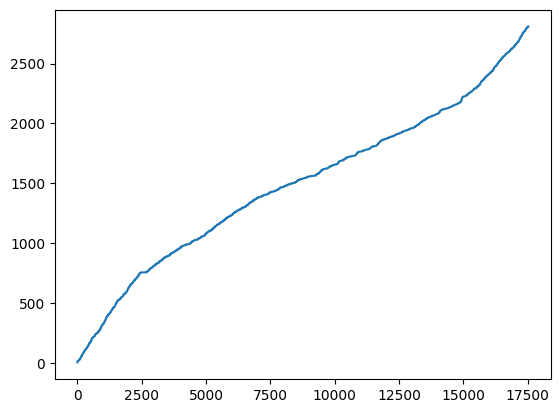

In [13]:
energymanagement1["Emissions"].cumsum().plot()

In [20]:
data["price"][-17520:].values

array([0.24614, 0.24279, 0.24104, ..., 0.24237, 0.24279, 0.24215])

In [12]:
action_df["1"]

0        1.350001e+00
1        6.839196e-07
2        1.806986e+00
3       -1.806987e+00
4        3.420769e-06
             ...     
17515    1.535993e+00
17516   -5.089995e-01
17517   -1.659990e-01
17518   -8.609992e-01
17519   -1.687000e+00
Name: 1, Length: 17520, dtype: float64

In [7]:
import numpy as np

total_profit = 0.0

# Lists to store the results
acts = []
total_emissions = []
soes = []
electricity_costs = []
penalties = []

# Iterate through actions and step through the environment
for action in actions:
        
    # Step through the environment with the action
    action = np.array([action], dtype=np.float32)
    print(env._electricity_cost)
    time_step = env._step(action)

    # Collect data
    act = action[0]
    total_emission = env._total_emissions
    soe = env._soe
    electricity_cost= env._electricity_cost
    penalty = env._penalty
   

    acts.append(act)
    total_emissions.append(total_emission)
    soes.append(soe)
    electricity_costs.append(electricity_cost)
    penalties.append(penalty)
    
    # Update the total profit
    total_profit = env._electricity_cost
    
print(f"Total Profit: {total_profit}")
print(f"Penalty: {penalty}")
time_step = env._reset()

0.0
-0.6692735613893509
-0.9661567999758528
-1.5566389804390237
-1.4481879829719826
-1.7353457599409672
-2.2627147036630815
-2.7706350230637544
-3.2857880195734586
-3.629146482178744
-3.5650785430613126
-3.524114574372348
-3.5067106187296475
-3.5757687746421993
-3.725126314190463
-3.89725165762102
-3.907053133270434
-3.9128776951442896
-3.9506221900752436
-3.9247061950038327
-3.9512610305325877
-4.107254471542872
-4.306818561202143
-4.6270017857611645
-4.861955855840815
-5.037978460637606
-5.046892496917513
-5.043092496337679
-5.275708041602953
-5.747850028504198
-6.239138186929033
-6.730357621311662
-7.098978689750383
-7.416961613158357
-7.774703990390259
-7.973738336221558
-8.004838942585847
-8.050127219968202
-8.113848414659287
-8.161028122133041
-8.168058610970474
-8.188855188483062
-8.184751204718413
-8.201916073470855
-8.222445049107147
-8.218417067661834
-8.174869065922332
-8.414662435969902
-8.458505852053696
-8.463885803991333
-8.47392965694452
-8.505580617907883
-8.5471703311

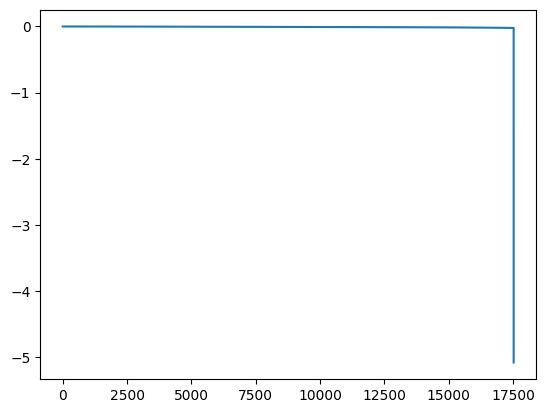

In [9]:
import matplotlib.pyplot as plt

plt.plot(penalties)

In [24]:
results_df = pd.DataFrame({
    'Action': acts,
    'total_emissions': total_emissions,
    'soes': soes,
    'electricity_costs': electricity_costs,
})

In [25]:
results_df['battery_level'] = results_df['Action'].cumsum()

<Axes: >

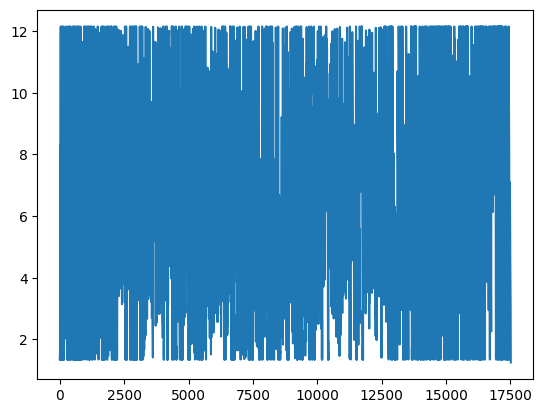

In [26]:
results_df["battery_level"].plot()

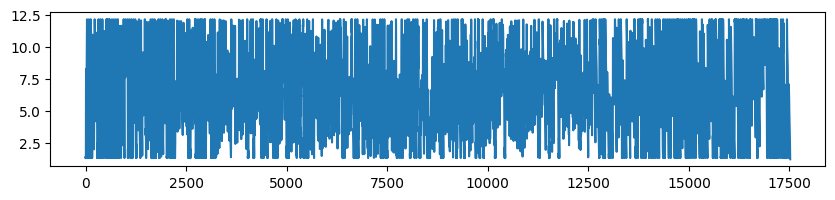

In [27]:
import matplotlib.pyplot as plt

# Create the plot
ax = results_df["soes"].plot( figsize=(10, 2))
plt.show()

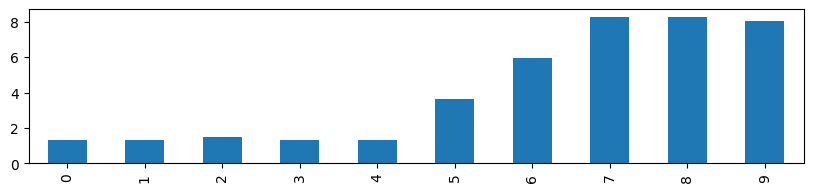

In [28]:
# Create the plot
ax = results_df["soes"][:10].plot(kind='bar', figsize=(10, 2))
plt.show()

In [29]:
results_df["soes"].describe()

count    17520.000000
mean         6.344512
std          3.179300
min          1.254015
25%          3.708846
50%          6.089524
75%          8.928252
max         12.150041
Name: soes, dtype: float64

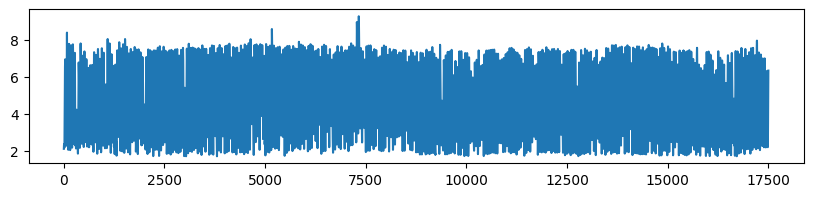

In [47]:
action_df = pd.read_csv("actions_building3_round_1.csv")
action_df['battery_level'] = action_df['Action'].cumsum()
#action_df
ax = action_df["battery_level"].plot( figsize=(10, 2))
plt.show()